In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
df = pd.read_csv('../data/electricity_cost.csv')
df.head()


,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [21]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.2+ KB


,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


In [22]:
df.isnull().sum()


site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

In [23]:
print(df.columns.tolist())


['site area', 'structure type', 'water consumption', 'recycling rate', 'utilisation rate', 'air qality index', 'issue reolution time', 'resident count', 'electricity cost']


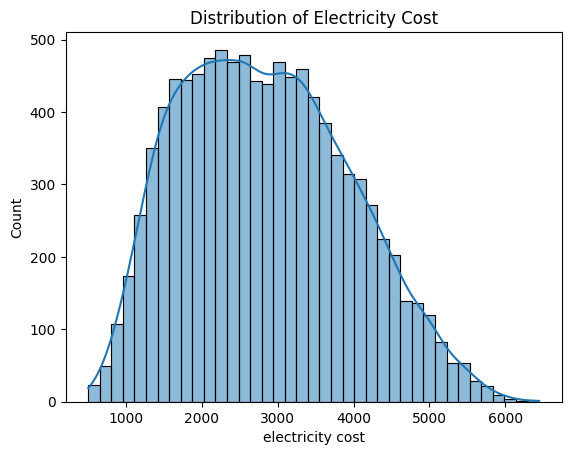

In [24]:
sns.histplot(df['electricity cost'], kde=True)
plt.title("Distribution of Electricity Cost")
plt.show()


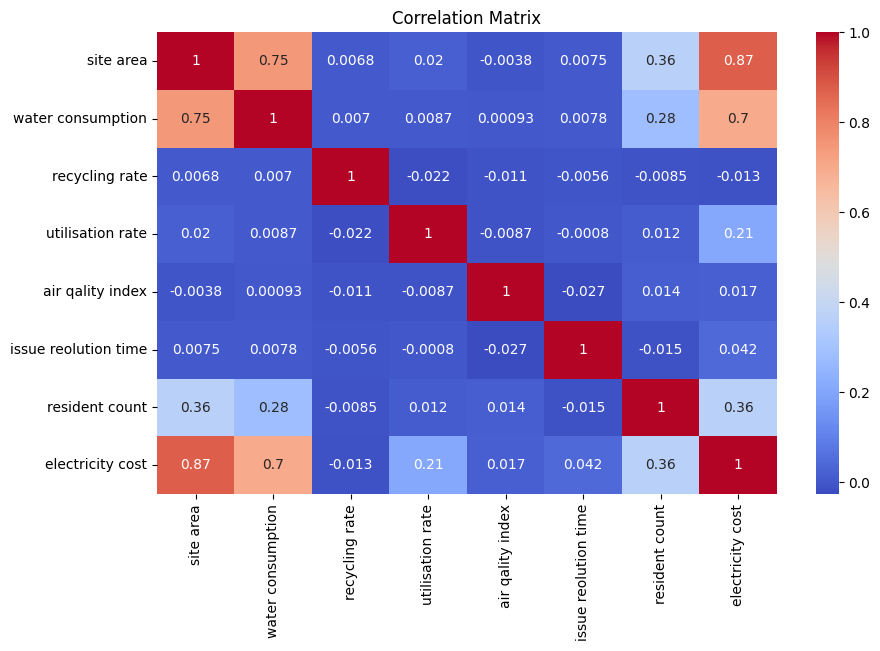

In [25]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [26]:
# Drop rows with missing values
df = df.dropna()
df.fillna(df.mean(numeric_only=True), inplace=True)


In [27]:
X = df.drop('electricity cost', axis=1)
y = df['electricity cost']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Categorical and numerical columns
cat_features = ['structure type']
num_features = [col for col in X.columns if col not in cat_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to lowercase string columns
def lowercase_columns(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.lower()
    return df

# Define lowercase transformer
lowercase = FunctionTransformer(lowercase_columns)

# Preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('lowercase', lowercase),
    ('transform', ColumnTransformer([
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ]))
])


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Full pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('lowercase', ...), ('transform', ...)]"
,transform_input,None
,memory,None
,verbose,False
,func,<function low...001F00353A7A0>
,inverse_func,None
,validate,False


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 220.41482616965675
MAE: 175.17197
R² Score: 0.9610557392328007


In [31]:
import joblib

# Save the full pipeline (preprocessing + model)
joblib.dump(model, '../app/model.joblib')

print("Model saved successfully.")


Model saved successfully.


In [32]:
print("Training target min:", y.min())
print("Training target max:", y.max())
print("Training target median:", y.median())


Training target min: 500.0
Training target max: 6446.0
Training target median: 2760.0


In [33]:
# Add the input you used in API to a DataFrame
sample_input = pd.DataFrame([{
    'site area': 1500,
    'structure type': 'commercial',
    'water consumption': 600,
    'recycling rate': 50,
    'utilisation rate': 80,
    'air qality index': 45,
    'issue reolution time': 12,
    'resident count': 30
}])

# Make sure structure type matches how it was trained
sample_input['structure type'] = sample_input['structure type'].str.lower()

# Predict in notebook
print("Prediction from notebook:", model.predict(sample_input)[0])


Prediction from notebook: 1894.0
